In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import math
from scipy.stats import zscore 

import pingouin as pg


Bad key "text.kerning_factor" on line 4 in
C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Preprocessing

In [2]:
def season(x):
    summer = [12,1,2]
    autumn = [3,4,5]
    winter = [6,7,8]
    spring = [9,10,11]
    if x in summer:
        return 'summer'
    elif x in autumn:
        return 'autumn'
    elif x in winter:
        return 'winter'
    elif x in spring:
        return 'spring'
    
def distance(y):
    if 0 < y <= 5:
        return 'very near'
    elif 5 < y <= 10:
        return 'near'
    elif 10 < y <= 15:
        return 'far'
    else:
        return 'very far'

In [ ]:
housing = pd.read_csv('Melbourne_housing_FULL.csv')
housing.head()

In [4]:
housing = housing.dropna()

In [5]:
housing['age'] = 2020 - housing['YearBuilt']
housing = housing.drop(['Address', 'SellerG', 'Postcode', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'YearBuilt', 'Bedroom2'], axis=1)

C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
housing['Date'] = pd.to_datetime(housing['Date'])
housing['month'] = housing['Date'].dt.month
housing['season'] = housing['month'].apply(season)
housing['Distance'] = housing['Distance'].apply(distance)
housing.drop(['Method'],axis=1, inplace=True)

r = housing[['Bathroom', 'Rooms', 'Type', 'Car', 'Suburb']]
housing = housing[r.replace(r.stack().value_counts()).gt(10).all(1)]

# EDA

In [7]:
housing

,Suburb,Rooms,Type,Price,Date,Distance,Bathroom,Car,Landsize,BuildingArea,age,month,season
2,Abbotsford,2,h,1035000.0,2016-04-02,very near,1.0,0.0,156.0,79.0,120.0,4,autumn
4,Abbotsford,3,h,1465000.0,2017-04-03,very near,2.0,0.0,134.0,150.0,120.0,4,autumn
6,Abbotsford,4,h,1600000.0,2016-04-06,very near,1.0,2.0,120.0,142.0,6.0,4,autumn
11,Abbotsford,3,h,1876000.0,2016-07-05,very near,2.0,0.0,245.0,210.0,110.0,7,winter
14,Abbotsford,2,h,1636000.0,2016-08-10,very near,1.0,2.0,256.0,107.0,130.0,8,winter
18,Abbotsford,2,h,1097000.0,2016-08-10,very near,1.0,2.0,220.0,75.0,120.0,8,winter
24,Abbotsford,3,h,1350000.0,2016-12-11,very near,2.0,2.0,214.0,190.0,15.0,12,summer
25,Abbotsford,2,u,750000.0,2016-12-11,very near,2.0,1.0,0.0,94.0,11.0,12,summer
30,Abbotsford,2,h,1310000.0,2016-10-15,very near,1.0,2.0,238.0,97.0,130.0,10,spring
32,Abbotsford,3,h,1200000.0,2016-07-16,very near,2.0,1.0,113.0,110.0,140.0,7,winter


In [8]:
housing.describe()

,Rooms,Price,Bathroom,Car,Landsize,BuildingArea,age,month
count,8338.000000,8.338000e+03,8338.000000,8338.000000,8338.000000,8338.000000,8338.000000,8338.000000
mean,3.077836,1.107430e+06,1.637443,1.668266,496.481650,148.419199,55.073639,6.722955
std,0.956941,6.911578e+05,0.710195,0.947869,789.602971,88.261629,37.549607,2.960255
min,1.000000,1.450000e+05,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,6.450000e+05,1.000000,1.000000,201.000000,99.000000,20.000000,4.000000
50%,3.000000,9.085000e+05,2.000000,2.000000,459.000000,131.000000,50.000000,7.000000
75%,4.000000,1.370000e+06,2.000000,2.000000,650.000000,180.000000,80.000000,9.000000
max,7.000000,9.000000e+06,6.000000,7.000000,37000.000000,3112.000000,824.000000,12.000000


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8338 entries, 2 to 34855
Data columns (total 13 columns):
Suburb          8338 non-null object
Rooms           8338 non-null int64
Type            8338 non-null object
Price           8338 non-null float64
Date            8338 non-null datetime64[ns]
Distance        8338 non-null object
Bathroom        8338 non-null float64
Car             8338 non-null float64
Landsize        8338 non-null float64
BuildingArea    8338 non-null float64
age             8338 non-null float64
month           8338 non-null int64
season          8338 non-null object
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 912.0+ KB


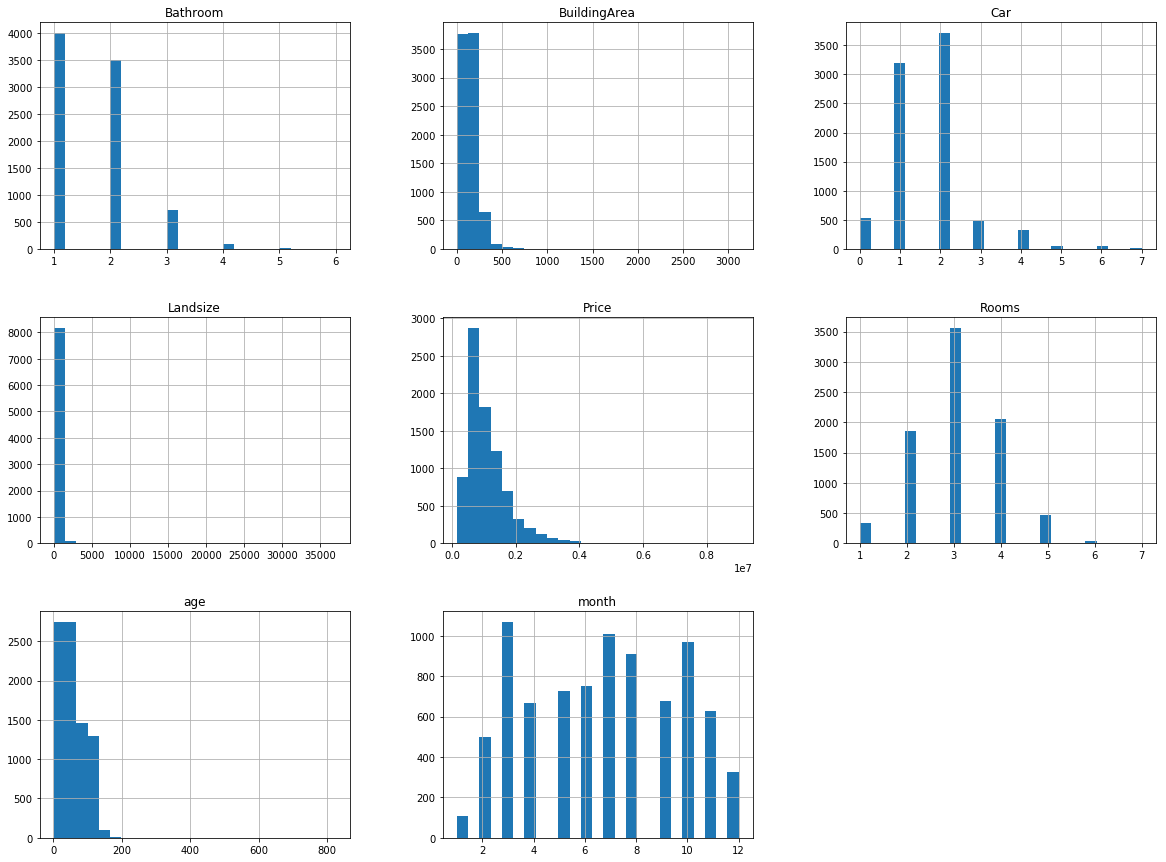

In [10]:
housing.hist(bins=25, figsize=(20,15))
plt.show()

In [11]:
for i in housing.columns:
    x = housing[i].nunique()
    print("Column name is:",i,"and it unique value is:",x)

Column name is: Suburb and it unique value is: 196
Column name is: Rooms and it unique value is: 7
Column name is: Type and it unique value is: 3
Column name is: Price and it unique value is: 1793
Column name is: Date and it unique value is: 77
Column name is: Distance and it unique value is: 4
Column name is: Bathroom and it unique value is: 6
Column name is: Car and it unique value is: 8
Column name is: Landsize and it unique value is: 1197
Column name is: BuildingArea and it unique value is: 568
Column name is: age and it unique value is: 143
Column name is: month and it unique value is: 12
Column name is: season and it unique value is: 4


### Timeseries plot

C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


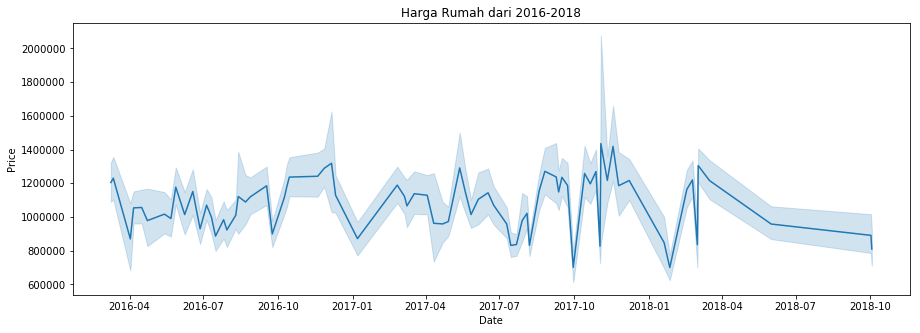

In [12]:
plt.figure(figsize=(15,5))
plt.title('Harga Rumah dari 2016-2018')
sns.lineplot(housing['Date'], housing['Price'])
plt.show()

### Scatterplot

C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


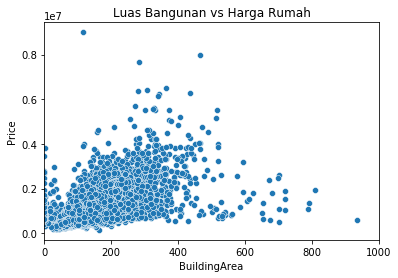

In [13]:
sns.scatterplot(housing['BuildingArea'], housing['Price'])
plt.xlim(0,1000)
plt.title('Luas Bangunan vs Harga Rumah')
plt.show()

C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


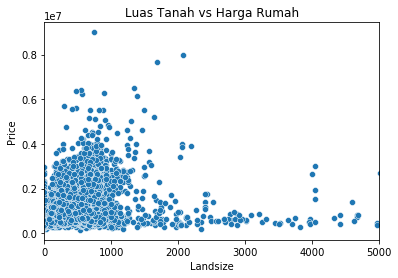

In [14]:
sns.scatterplot(housing['Landsize'], housing['Price'])
plt.xlim(0,5000)
plt.title('Luas Tanah vs Harga Rumah')
plt.show()

C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


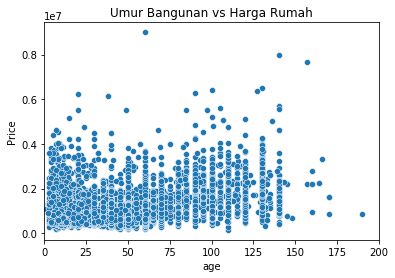

In [15]:
sns.scatterplot(housing['age'], housing['Price'])
plt.xlim(0,200)
plt.title('Umur Bangunan vs Harga Rumah')
plt.show()

### Bar/count plot

C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


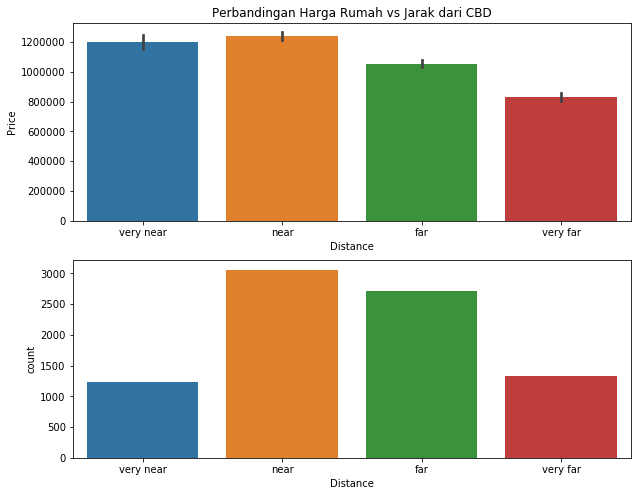

In [16]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
sns.barplot(housing['Distance'], housing['Price'], ax=ax1, order=['very near', 'near', 'far', 'very far']).set_title('Perbandingan Harga Rumah vs Jarak dari CBD')
sns.countplot(housing['Distance'], ax=ax2, order=['very near', 'near', 'far', 'very far'])
plt.show()

C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


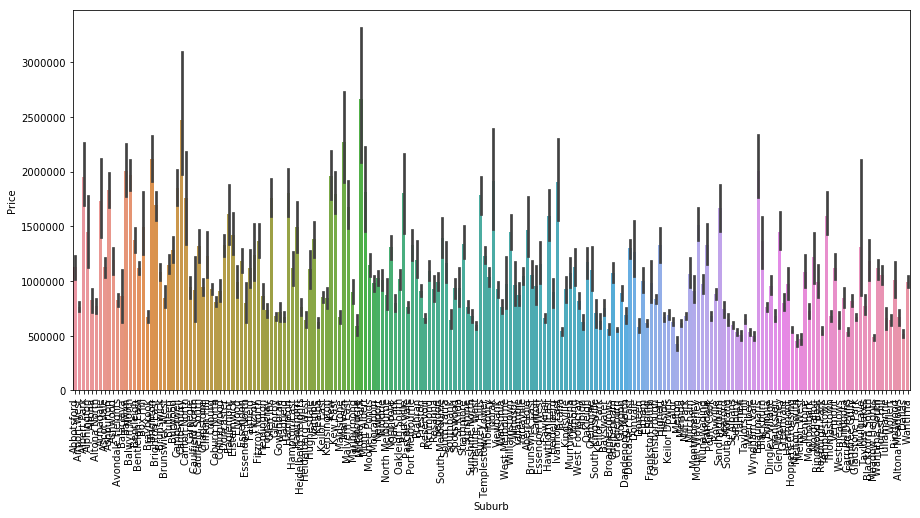

In [17]:
plt.figure(figsize=(15,7))
sns.barplot(housing['Suburb'], housing['Price'])
plt.xticks(rotation=90)
plt.show()

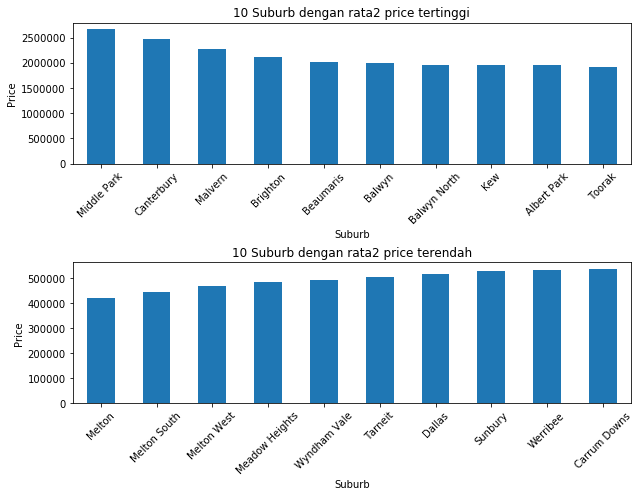

In [18]:
plt.figure(figsize=(10,7))
plt.subplots_adjust(hspace = 0.7)
plt.title('')

plt.subplot(2,1,1)
housing.groupby('Suburb').mean()['Price'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('10 Suburb dengan rata2 price tertinggi')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.subplot(2,1,2)
housing.groupby('Suburb').mean()['Price'].sort_values().head(10).plot(kind='bar')
plt.title('10 Suburb dengan rata2 price terendah')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.show()

C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


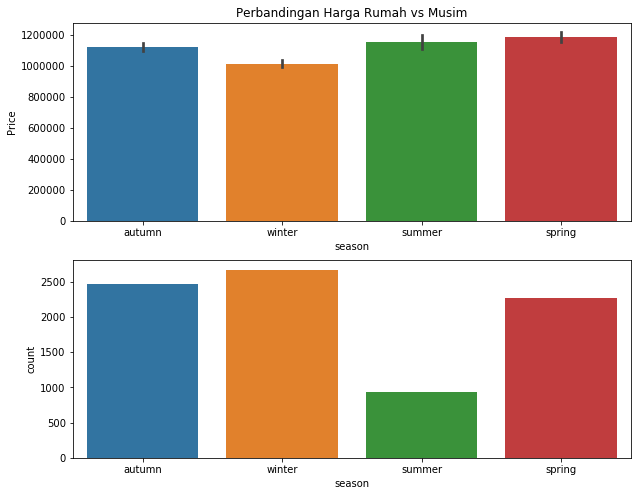

In [19]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
sns.barplot(housing['season'], housing['Price'], ax=ax1).set_title('Perbandingan Harga Rumah vs Musim')
sns.countplot(housing['season'], ax=ax2)
plt.show()

C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


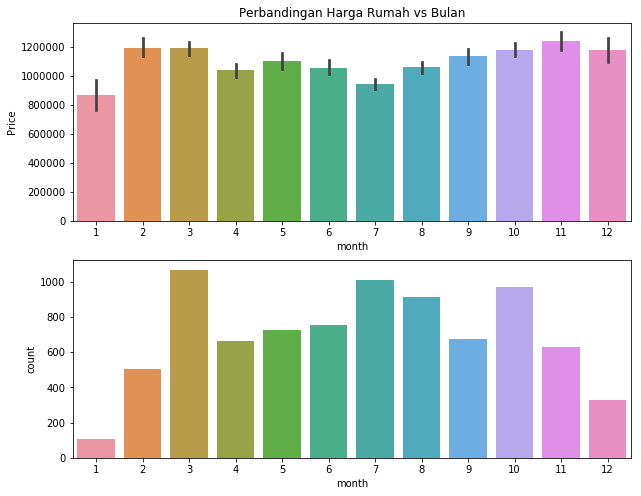

In [20]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
sns.barplot(housing['month'], housing['Price'], ax=ax1).set_title('Perbandingan Harga Rumah vs Bulan')
sns.countplot(housing['month'], ax=ax2)
plt.show()

### Histogram

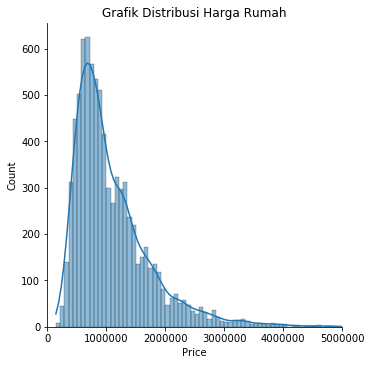

In [21]:
sns.displot(housing['Price'], kde=True)
plt.xlim(0,5000000)
plt.title('Grafik Distribusi Harga Rumah')
plt.show()

In [22]:
housing['Price'].skew()

2.3734265397215477

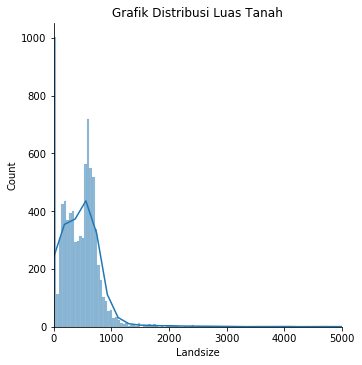

In [23]:
sns.displot(housing['Landsize'], kde=True)
plt.xlim(0,5000)
plt.title('Grafik Distribusi Luas Tanah')
plt.show()

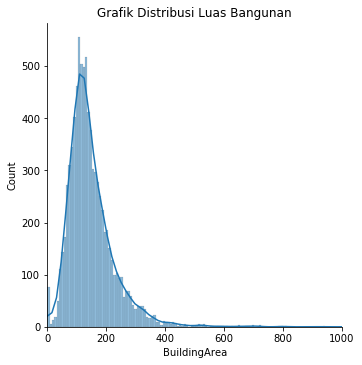

In [24]:
sns.displot(housing['BuildingArea'], kde=True)
plt.xlim(0,1000)
plt.title('Grafik Distribusi Luas Bangunan')
plt.show()

In [25]:
housing['BuildingArea'].skew()

6.729234389471315

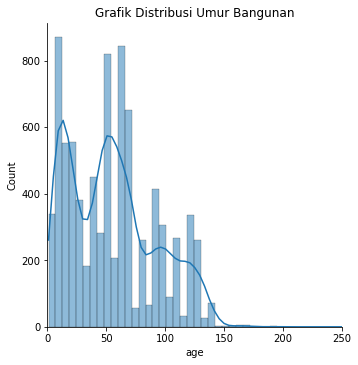

In [26]:
sns.displot(housing['age'], kde=True)
plt.xlim(0,250)
plt.title('Grafik Distribusi Umur Bangunan')
plt.show()

In [27]:
housing['age'].skew()

1.4786379422711207

C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Future

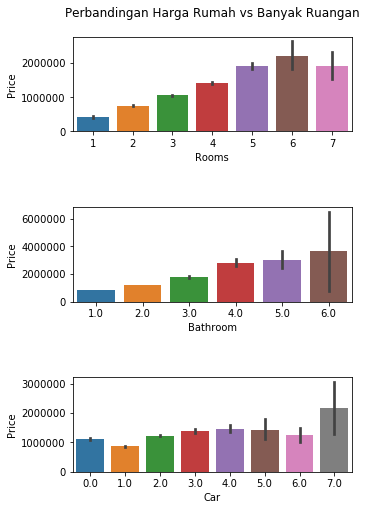

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(5,8))
plt.subplots_adjust(hspace = 0.8)
sns.barplot(housing['Rooms'], housing['Price'],ax=ax1).set_title('Perbandingan Harga Rumah vs Banyak Ruangan', pad=20)
sns.barplot(housing['Bathroom'], housing['Price'],ax=ax2)
sns.barplot(housing['Car'], housing['Price'],ax=ax3)
plt.show()

### Boxplot

C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


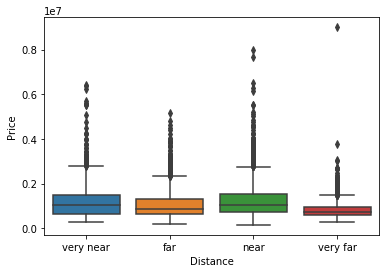

In [29]:
sns.boxplot(housing['Distance'], housing['Price'])
plt.show()

C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


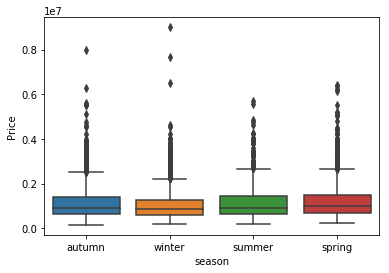

In [30]:
sns.boxplot(housing['season'], housing['Price'])
plt.show()

C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


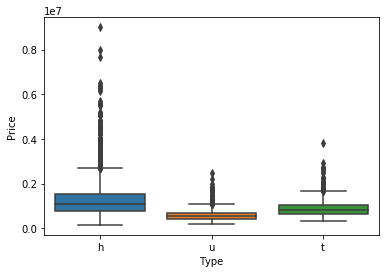

In [31]:
sns.boxplot(housing['Type'], housing['Price'])
plt.show()

C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


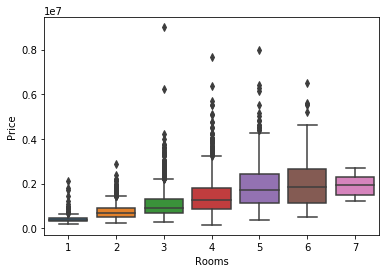

In [32]:
sns.boxplot(housing['Rooms'], housing['Price'])
plt.show()

C:\Users\LEON\anaconda3\envs\monenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


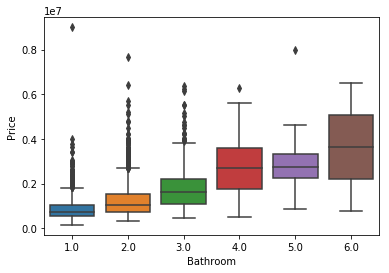

In [33]:
sns.boxplot(housing['Bathroom'], housing['Price'])
plt.show()

In [34]:
from flask import Flask, request, jsonify, render_template
from flask_mysqldb import MySQL

app = Flask(__name__)
app.config['MYSQL_USER'] = 'root'
app.config['MYSQL_PASSWORD'] = 'blueprint23'
app.config['MYSQL_HOST'] = '127.0.0.1'
app.config['MYSQL_DB'] = 'melbourne'
app.config['MYSQL_PORT'] = 3306

app.config['MYSQL_CURSORCLASS'] = 'DictCursor'
app.config['JSON_SORT_KEYS'] = False

# object untuk membuat koneksi terhadap mysql
mysql = MySQL(app)

ModuleNotFoundError: No module named 'flask_mysqldb'

In [ ]:
cur = mysql.connection.cursor()
sql = f"select * from housing order by id desc limit 1;"
cur.execute(sql)
data = cur.fetchall()